In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle, os
import pandas as pd
import bottleneck as bn

## Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [3]:
plain_md_path = '../Plain_MD/analysis'

df_stationary_p = pd.read_csv(f"{plain_md_path}/autocoorel_data/trans_population_at_lagtime.csv")
df_stationary_p['state'] = 0  # or whatever state index it should be
print(df_stationary_p)
    
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='state', columns='res', values='mean')
pivot_std = df_stationary_p.pivot(index='state', columns='res', values='std')

# Convert to NumPy arrays
plain_md_trans_refer = pivot_mean.to_numpy()  # shape (1, 3) state, residues 
plain_md_trans_refer_err = pivot_std.to_numpy()  # shape (1, 3)
plain_md_trans_refer.shape

   res  lagtime_index  lagtime_ns      mean       std  state
0    0             24       201.0  0.725067  0.028305      0
1    1             24       201.0  0.473500  0.107153      0
2    2             24       201.0  0.548286  0.084071      0


(1, 3)

In [4]:
plain_md_path = '../Plain_MD/analysis'


population_loaded = Data.load(f"{plain_md_path}/population_data/population_res.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

plain_md_population_mean = population_mean
plain_md_population_std = population_std
plain_md_population_mean.shape

(3, 345495)

/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_25800/902310599.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/starwing/miniconda3/envs/peptoid_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


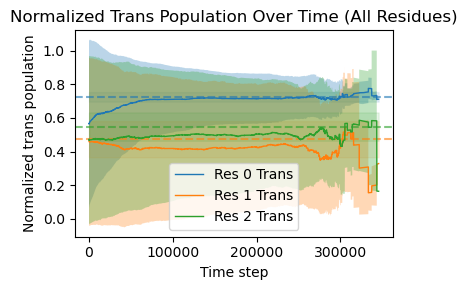

In [5]:
conform_num = 2
thermal_num = 1
res_num = 3

plt.figure(figsize=(4, 3))  # ✅ One figure for all residues

for res in range(res_num):
    x = np.arange(plain_md_population_mean.shape[1])
    mean = plain_md_population_mean[res]
    std = plain_md_population_std[res]

    plt.plot(x, mean, label=f"Res {res} Trans", linewidth=1)
    plt.fill_between(x,
                        mean - std,
                        mean + std,
                        alpha=0.3)

    # Reference horizontal line
    ref_y = plain_md_trans_refer[:, res]
    ref_yerr = plain_md_trans_refer_err[:,res]

    plt.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
    plt.fill_between(x, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)

# Customize and show the plot after the loop
#plt.ylim(0.4, 0.8)
plt.xlabel("Time step")
plt.ylabel("Normalized trans population")
plt.title("Normalized Trans Population Over Time (All Residues)")
plt.legend()
plt.tight_layout()
plt.show()


## EE

In [6]:
## Load in the refer values calculated by MSM
ee_path = '../EE/analysis'
df_stationary_p = pd.read_csv(f"{ee_path}/autocoorel_data/trans_population_at_lagtime.csv")
#print(df_stationary_p)
    
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='state', columns='res', values='mean')
pivot_std = df_stationary_p.pivot(index='state', columns='res', values='std')

# Convert to NumPy arrays
ee_trans_refer = pivot_mean.to_numpy()  # shape (6, 3) state, residues 
ee_trans_refer_err = pivot_std.to_numpy()  # shape (6, 3)
ee_trans_refer.shape

(4, 3)

In [7]:
ee_path = '../EE/analysis'


population_loaded = Data.load(f"{ee_path}/population_data/population_res.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

ee_population_mean = population_mean
ee_population_std = population_std
ee_population_mean.shape

(3, 4, 2, 91002)

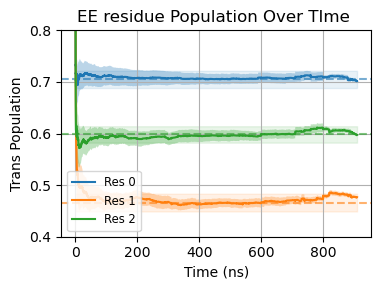

In [8]:
dt_in_ns = 0.01  # 10 ps = 0.01 ns
thermal_num = 1
res_num = 3

for thermal in range(thermal_num):
    time = np.arange(ee_population_mean.shape[3])
    time_ns = time * dt_in_ns  # Convert time steps to nanoseconds

    plt.figure(figsize=(4, 3))

    for res in range(res_num):
        mean = ee_population_mean[res, thermal, 1, :]
        std = ee_population_std[res, thermal, 1, :]
        
        plt.plot(time_ns, mean, label=f'Res {res}')
        plt.fill_between(time_ns, mean - std, mean + std, alpha=0.3)

        # Reference horizontal line
        ref_y = ee_trans_refer[thermal, res]
        ref_yerr = ee_trans_refer_err[thermal, res]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
        plt.fill_between(time_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)
    # Optional: set y-axis limits if you want consistency across plots
    plt.ylim(0.4, 0.8)

    plt.xlabel("Time (ns)")
    plt.ylabel("Trans Population")
    plt.title(f"EE residue Population Over TIme ")
    plt.legend(ncol=1, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## HREX

In [9]:
hrex_path = '../HREX/analysis'


df_stationary_p = pd.read_csv(f"{hrex_path}/autocoorel_data/trans_population_at_lagtime.csv")
#print(df_stationary_p)  
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='state', columns='res', values='mean')
pivot_std = df_stationary_p.pivot(index='state', columns='res', values='std')

# Convert to NumPy arrays
trans_refer_array = pivot_mean.to_numpy()  # shape (6, 3) state, residues 
trans_refer_err_array = pivot_std.to_numpy()  # shape (6, 3)
trans_refer_array.shape
trans_refer_array[0]

array([0.71117256, 0.4531241 , 0.57496825])

In [10]:
hrex_path = '../HREX/analysis'


population_loaded = Data.load(f"{hrex_path}/population_data/population_res.pkl").array_list
population_mean = population_loaded[0]
hrex_population_mean = population_mean
hrex_population_mean.shape

(6, 3, 600030)

/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_25800/2086138552.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/starwing/miniconda3/envs/peptoid_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


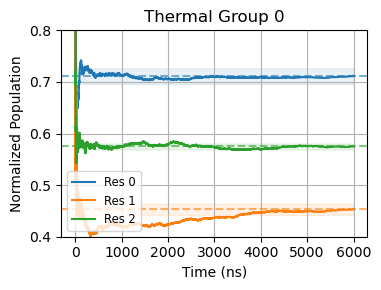

In [11]:
dt_in_ns = 0.01  # 10 ps = 0.01 ns
thermal_num = 1
res_num = 3

for thermal in range(thermal_num):
    time = np.arange(hrex_population_mean.shape[2])
    time_ns = time * dt_in_ns  # Convert time steps to nanoseconds

    plt.figure(figsize=(4, 3))

    for res in range(res_num):
        mean = hrex_population_mean[thermal, res, :]
        plt.plot(time_ns, mean, label=f'Res {res}')

        # Plot the reference horizontal line with error band
        ref_y = trans_refer_array[thermal, res]
        ref_yerr = trans_refer_err_array[thermal, res]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
        plt.fill_between(time_ns,
                         ref_y - ref_yerr,
                         ref_y + ref_yerr,
                         color=f'C{res}', alpha=0.1)


    # Optional: set y-axis limits if you want consistency across plots
    plt.ylim(0.4, 0.8)

    plt.xlabel("Time (ns)")
    plt.ylabel("Normalized Population")
    plt.title(f"Thermal Group {thermal}")
    plt.legend(ncol=1, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## REDs

In [12]:
reds_path = '../REDs/analysis'
df_stationary_p = pd.read_csv(f"{reds_path}/autocoorel_data/trans_population_at_lagtime.csv")
#print(df_stationary_p)

    
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='state', columns='res', values='mean')
pivot_std = df_stationary_p.pivot(index='state', columns='res', values='std')

# Convert to NumPy arrays
reds_trans_refer_array = pivot_mean.to_numpy()  # shape (6, 3) state, residues 
reds_trans_refer_err_array = pivot_std.to_numpy()  # shape (6, 3)
reds_trans_refer_array.shape
reds_trans_refer_array[0]

array([0.72310622, 0.46004966, 0.59262221])

In [13]:
reds_path = '../REDs/analysis'


population_loaded = Data.load(f"{reds_path}/population_data/population_res.pkl").array_list
population_mean = population_loaded[0]

reds_population_mean = population_mean
reds_population_mean.shape

(3, 3, 337514)

/Users/starwing/miniconda3/envs/peptoid_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


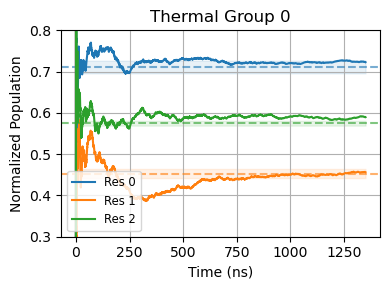

In [14]:
dt_in_ns = 0.004  
thermal_num = 1
res_num = 3

for thermal in range(thermal_num):
    time = np.arange(reds_population_mean.shape[2])
    time_ns = time * dt_in_ns  # Convert time steps to nanoseconds

    plt.figure(figsize=(4, 3))

    for res in range(res_num):
        mean = reds_population_mean[thermal, res, :]        
        plt.plot(time_ns, mean, label=f'Res {res}')

        # Reference horizontal line
        ref_y = trans_refer_array[thermal, res]
        ref_yerr = trans_refer_err_array[thermal, res]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
        plt.fill_between(time_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)


    # Optional: set y-axis limits if you want consistency across plots
    plt.ylim(0.3, 0.8)

    plt.xlabel("Time (ns)")
    plt.ylabel("Normalized Population")
    plt.title(f"Thermal Group {thermal}")
    plt.legend(ncol=1, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Combined Plot

/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_25800/441404763.py:83: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.92])
/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_25800/441404763.py:86: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("fig/population_over_time_all_res_log_scale.png", dpi=300)
/Users/starwing/miniconda3/envs/peptoid_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


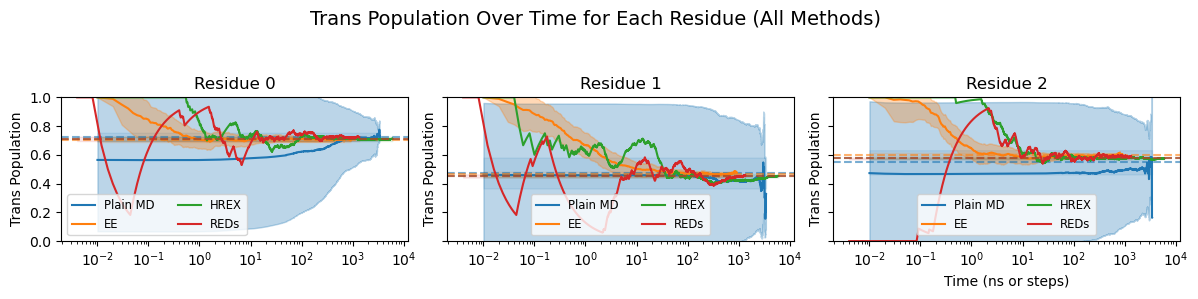

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
res_num = 3
thermal = 0
use_ylim = True
ylim_low = 0.0
ylim_high = 1
use_logscale_x = True  # Toggle for log scale on x-axis

method_labels = ['Plain MD', 'EE', 'HREX', 'REDs']
colors = ['C0', 'C1', 'C2', 'C3']

# Time arrays (start from 1 to avoid log(0))
time_md = np.arange(1, plain_md_population_mean.shape[1] + 1) * 0.01
time_ee = np.arange(1, ee_population_mean.shape[3] + 1) * 0.01
time_hrex = np.arange(1, hrex_population_mean.shape[2] + 1) * 0.01
time_reds = np.arange(1, reds_population_mean.shape[2] + 1) * 0.004

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
axes = axes.flatten()

for res in range(res_num):
    ax = axes[res]

    # --- Plain MD ---
    mean = plain_md_population_mean[res]
    std = plain_md_population_std[res]
    ref_y = plain_md_trans_refer[:, res]
    ref_yerr = plain_md_trans_refer_err[:, res]

    ax.plot(time_md, mean, label='Plain MD', color=colors[0])
    ax.fill_between(time_md, mean - std, mean + std, color=colors[0], alpha=0.3, rasterized=True)
    ax.axhline(ref_y, linestyle='--', color=colors[0], alpha=0.6)
    ax.fill_between(time_md, ref_y - ref_yerr, ref_y + ref_yerr, color=colors[0], alpha=0.1, rasterized=True)

    # --- EE ---
    mean = ee_population_mean[res, thermal, 1, :]
    std = ee_population_std[res, thermal, 1, :]
    ref_y = ee_trans_refer[thermal, res]
    ref_yerr = ee_trans_refer_err[thermal, res]

    ax.plot(time_ee, mean, label='EE', color=colors[1])
    ax.fill_between(time_ee, mean - std, mean + std, color=colors[1], alpha=0.3, rasterized=True)
    ax.axhline(ref_y, linestyle='--', color=colors[1], alpha=0.6)
    ax.fill_between(time_ee, ref_y - ref_yerr, ref_y + ref_yerr, color=colors[1], alpha=0.1, rasterized=True)

    # --- HREX ---
    mean = hrex_population_mean[thermal, res, :]
    ref_y = trans_refer_array[thermal, res]
    ref_yerr = trans_refer_err_array[thermal, res]

    ax.plot(time_hrex, mean, label='HREX', color=colors[2])
    ax.axhline(ref_y, linestyle='--', color=colors[2], alpha=0.6)
    ax.fill_between(time_hrex, ref_y - ref_yerr, ref_y + ref_yerr, color=colors[2], alpha=0.1, rasterized=True)

    # --- REDs ---
    mean = reds_population_mean[thermal, res, :]
    ref_y = trans_refer_array[thermal, res]
    ref_yerr = trans_refer_err_array[thermal, res]

    ax.plot(time_reds, mean, label='REDs', color=colors[3])
    ax.axhline(ref_y, linestyle='--', color=colors[3], alpha=0.6)
    ax.fill_between(time_reds, ref_y - ref_yerr, ref_y + ref_yerr, color=colors[3], alpha=0.1, rasterized=True)

    # Axes formatting
    ax.set_title(f'Residue {res}')
    if use_logscale_x:
        ax.set_xscale('log')
    if use_ylim:
        ax.set_ylim(ylim_low, ylim_high)
    ax.set_ylabel("Trans Population")
    ax.legend(fontsize='small', ncol=2)

axes[-1].set_xlabel("Time (ns or steps)")

# Suptitle before tight_layout
plt.suptitle("Trans Population Over Time for Each Residue (All Methods)", fontsize=14)

# Use tight_layout after suptitle to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.92])

# Save PNG
plt.savefig("fig/population_over_time_all_res_log_scale.png", dpi=300)
plt.show()


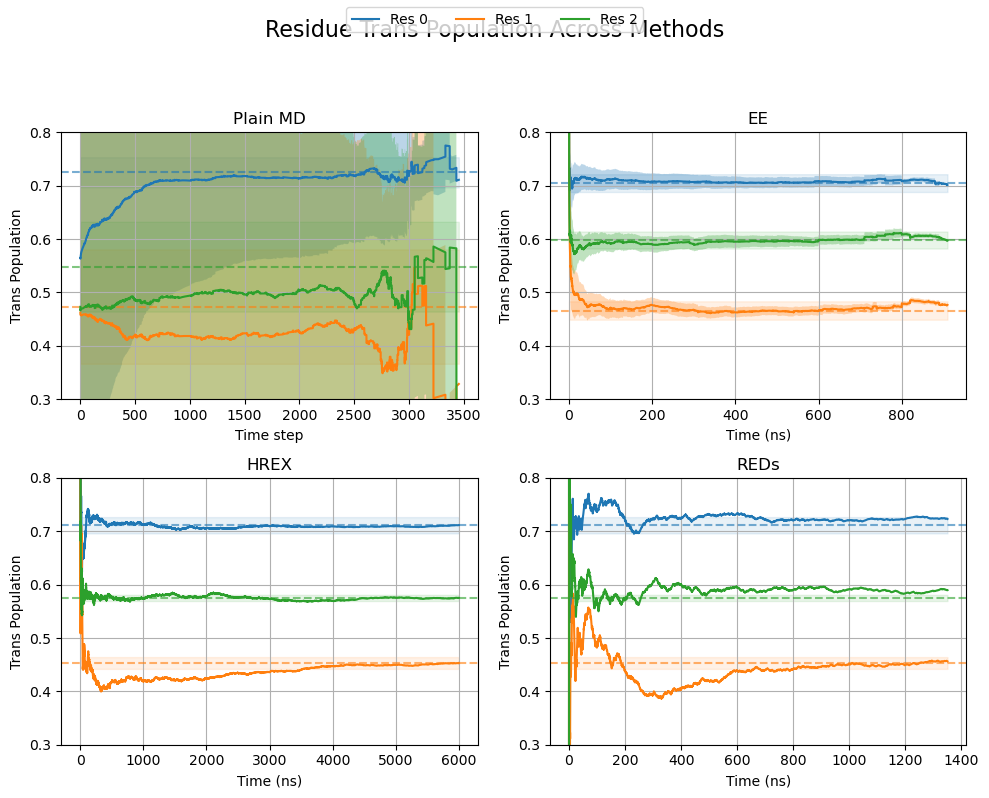

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
res_num = 3
thermal = 0  # Since thermal_num = 1
use_ylim = True
ylim_low = 0.3
ylim_high = 0.8

# Time arrays
time_md = np.arange(plain_md_population_mean.shape[1]) * 0.01
time_ee = np.arange(ee_population_mean.shape[3]) * 0.01
time_hrex = np.arange(hrex_population_mean.shape[2]) * 0.01
time_reds = np.arange(reds_population_mean.shape[2]) * 0.004

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# --- Plot 1: Plain MD ---
ax = axes[0]
for res in range(res_num):
    mean = plain_md_population_mean[res]
    std = plain_md_population_std[res]
    ref_y = plain_md_trans_refer[:, res]
    ref_yerr = plain_md_trans_refer_err[:, res]

    ax.plot(time_md, mean, label=f"Res {res}")
    ax.fill_between(time_md, mean - std, mean + std, alpha=0.3)
    ax.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
    ax.fill_between(time_md, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)

ax.set_title("Plain MD")
ax.set_xlabel("Time step")
ax.set_ylabel("Trans Population")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)

# --- Plot 2: EE ---
ax = axes[1]
for res in range(res_num):
    mean = ee_population_mean[res, thermal, 1, :]
    std = ee_population_std[res, thermal, 1, :]
    ref_y = ee_trans_refer[thermal, res]
    ref_yerr = ee_trans_refer_err[thermal, res]

    ax.plot(time_ee, mean, label=f"Res {res}")
    ax.fill_between(time_ee, mean - std, mean + std, alpha=0.3)
    ax.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
    ax.fill_between(time_ee, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)

ax.set_title("EE")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Trans Population")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)

# --- Plot 3: HREX ---
ax = axes[2]
for res in range(res_num):
    mean = hrex_population_mean[thermal, res, :]
    ref_y = trans_refer_array[thermal, res]
    ref_yerr = trans_refer_err_array[thermal, res]

    ax.plot(time_hrex, mean, label=f"Res {res}")
    ax.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
    ax.fill_between(time_hrex, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)

ax.set_title("HREX")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Trans Population")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)

# --- Plot 4: REDs ---
ax = axes[3]
for res in range(res_num):
    mean = reds_population_mean[thermal, res, :]
    ref_y = trans_refer_array[thermal, res]
    ref_yerr = trans_refer_err_array[thermal, res]

    ax.plot(time_reds, mean, label=f"Res {res}")
    ax.axhline(y=ref_y, linestyle='--', color=f'C{res}', alpha=0.6)
    ax.fill_between(time_reds, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{res}', alpha=0.1)

ax.set_title("REDs")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Trans Population")
if use_ylim: ax.set_ylim(ylim_low, ylim_high)
ax.grid(True)

# Shared legend and layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize='medium')
plt.suptitle("Residue Trans Population Across Methods", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("fig/population_over_time_all_res.png", dpi=300)
plt.show()
